# Applying Machine Learning to Ames housing data to predict sale prices
## Shameer Sukha - Jan 2020

This notebook applies machine learning techniques to the Ames housing data to predict **sales prices** from various other variables related to a house. It is in response to the NYDSA - Machine Learning project.

It conducts a walk-through of the data science lifecycle for machine learning comprising of data cleaning, imputation, analysis, wrangling, visualisation and finally modelling.

## Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Print information about data for reference

In [2]:

filename = '.\data\data_description.txt'
with open(filename) as f:
    for line in f:
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

## Load Data
1. Use downloaded train data from Kaggle, test data is not useful since it does not contain SalePrice because of competition
2. Use 70/30 split to hold-out 30% of training data but only after all data cleaning and pre-processing completed.


In [3]:
# Read .csv files
housing = pd.read_csv('./data/train.csv')
housing.shape

(1460, 81)

## Data Exploration
1. Create useful initial summary of variables, which will help with **missingness** and **feature selection**
2. Create charts and stats to summarise SalePrice target variable
3. Create charts and stats to summarise SalePrice with features expected to be important
3. Create charts and stats to understand relationships amongst all variables with themselves and avoid multicollinearity

In [4]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [5]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Year is an ordinal variable because inflation and age affects values so leave as numeric type. 
# However month is categorical not numerical - MoSold
# In addition MSSubClass is categorical but stored as numerical
# Convert these two variables as strings
housing['MSSubClass'] = housing['MSSubClass'].apply(str)
housing['MoSold'] = housing['MoSold'].astype(str)

In [7]:
def bespoke_pcorr(df, response, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    correlation of response variable with other variables in df and labels the 
    column varname.
    """
    response_corr = pd.DataFrame(df.corr(method='pearson')[response]).reset_index()
    response_corr.columns = [varname, 'PearsonCorr']
    return response_corr


def bespoke_outliers(df, factor, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    number of outliers past factor multiple of the inter-quartile range according to the Tukey method.
    """
    # Define helper function to count outliers in a given column col past a factor multiple of the
    # inter-quartile range
    def count_outliers(col, factor):
        try:
            #1st quartile (25%)
            Q1 = np.percentile(col, 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(col, 75)
            # Interquartile range (IQR)
            IQR = Q3 - Q1
        
            # outlier step
            outlier_step = factor * IQR
        
            # Determine a list of indices of outliers for feature col
            numout = col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)].shape[0]
            return numout
        except:
            return 0

    outliers = pd.DataFrame(df.apply(lambda x: count_outliers(x, factor), axis=0)).reset_index()
    outliers.columns = [varname, 'NumOutliers']
    
    return outliers   


# Define own function to summarise data
def summarise_data(df, response):
    """
    Takes a dataframe df of numerical of numerical and categorical variables and creates a bespoke
    summary that is helpful for regression/predictive tasks. The target variable is identified with 
    response input and the rest are assumed to be features.
    
    Output shows columns as follows:
    1. Predictor variable name
    2. Count of values in feature 
    3. Count of missing values
    4. Total length of column
    5. Percentage missing in each feature
    6. Type of feature: numerical or categorical
    7. If categorical variable, then number of catgories
    8. If numerical variable, the skewness (0 being no skew of Normal dist)
    9. If numerical variable, Pearson correlation with target variable identified in response
    10. If numerical variable, Number of outliers based on Tukey's method of factor (1.5) times inter-quartile range
    """
    tempdf = pd.DataFrame(df.count()).reset_index()
    tempdf.columns = ['Predictor', 'ValueCount']
    tempdf['MissingCount'] = tempdf['Predictor'].apply(lambda x: df[x].isnull().sum())
    tempdf['TotalCount'] = tempdf['ValueCount'] + tempdf['MissingCount']
    tempdf['MissingPercent'] = tempdf['MissingCount'] / len(df)
    tempdf['VariableType'] = tempdf['Predictor'].apply(lambda x: 'categorical' if df[x].dtype=='object' else 'numerical')
    tempdf['CountCategories'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf['Skewness'] = [stats.skew(df[col]) if df[col].dtype != 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf = tempdf.merge(bespoke_pcorr(df, response, 'Predictor'), how='left', on='Predictor')
    tempdf = tempdf.merge(bespoke_outliers(df, 1.5, 'Predictor'), how='left', on='Predictor')
    tempdf.reset_index(drop=True, inplace=True)
        
    return tempdf


In [8]:
# Variables with missing values ranked by percentage missing
summarydf = summarise_data(housing, 'SalePrice')
mask = summarydf.MissingPercent > 0
missing_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('MissingPercent', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
72,PoolQC,7,1453,1460,0.995205,categorical,3,0.0,NaN,0
74,MiscFeature,54,1406,1460,0.963014,categorical,4,0.0,NaN,0
6,Alley,91,1369,1460,0.937671,categorical,2,0.0,NaN,0
73,Fence,281,1179,1460,0.807534,categorical,4,0.0,NaN,0
57,FireplaceQu,770,690,1460,0.472603,categorical,5,0.0,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.351799,30
58,GarageType,1379,81,1460,0.055479,categorical,6,0.0,NaN,0
59,GarageYrBlt,1379,81,1460,0.055479,numerical,0,NaN,0.486362,0
60,GarageFinish,1379,81,1460,0.055479,categorical,3,0.0,NaN,0
63,GarageQual,1379,81,1460,0.055479,categorical,5,0.0,NaN,0


In [9]:
summarydf

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
0,Id,1460,0,1460,0.000000,numerical,0,0.000000,-0.021917,0
1,MSSubClass,1460,0,1460,0.000000,categorical,15,0.000000,NaN,0
2,MSZoning,1460,0,1460,0.000000,categorical,5,0.000000,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.351799,30
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.263843,69
...,...,...,...,...,...,...,...,...,...,...
76,MoSold,1460,0,1460,0.000000,categorical,12,0.000000,NaN,0
77,YrSold,1460,0,1460,0.000000,numerical,0,0.096170,-0.028923,0
78,SaleType,1460,0,1460,0.000000,categorical,9,0.000000,NaN,0
79,SaleCondition,1460,0,1460,0.000000,categorical,6,0.000000,NaN,0


In [10]:
# Store lists of names of numerical and categorical features
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of categorical variables are: %.0i' %len(categorical_vars))
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of numerical variables are: %.0i' %len(numerical_vars))

The number of categorical variables are: 45
The number of numerical variables are: 36


In [11]:
# Variables with skewness greater than 0.6, ranked by skewness
mask = (np.abs(summarydf.Skewness) > 0.6) & (summarydf.VariableType == 'numerical')
skew_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
75,MiscVal,1460,0,1460,0.0,numerical,0,24.451640,-0.021190,52
71,PoolArea,1460,0,1460,0.0,numerical,0,14.813135,0.092404,7
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.263843,69
69,3SsnPorch,1460,0,1460,0.0,numerical,0,10.293752,0.044584,24
45,LowQualFinSF,1460,0,1460,0.0,numerical,0,9.002080,-0.025606,26
52,KitchenAbvGr,1460,0,1460,0.0,numerical,0,4.483784,-0.135907,68
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,-0.011378,167
70,ScreenPorch,1460,0,1460,0.0,numerical,0,4.117977,0.111447,116
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,-0.016844,82
68,EnclosedPorch,1460,0,1460,0.0,numerical,0,3.086696,-0.128578,208


In [12]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
mask = (np.abs(summarydf.PearsonCorr) > 0.5) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('PearsonCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
80,SalePrice,1460,0,1460,0.0,numerical,0,1.880941,1.000000,61
17,OverallQual,1460,0,1460,0.0,numerical,0,0.216721,0.790982,2
46,GrLivArea,1460,0,1460,0.0,numerical,0,1.365156,0.708624,31
61,GarageCars,1460,0,1460,0.0,numerical,0,-0.342197,0.640409,5
62,GarageArea,1460,0,1460,0.0,numerical,0,0.179796,0.623431,21
38,TotalBsmtSF,1460,0,1460,0.0,numerical,0,1.522688,0.613581,61
43,1stFlrSF,1460,0,1460,0.0,numerical,0,1.375342,0.605852,20
49,FullBath,1460,0,1460,0.0,numerical,0,0.036524,0.560664,0
54,TotRmsAbvGrd,1460,0,1460,0.0,numerical,0,0.675646,0.533723,30
19,YearBuilt,1460,0,1460,0.0,numerical,0,-0.612831,0.522897,7


In [13]:
# Variables with large number of outliers ranked by count of possible outliers
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.000000,numerical,0,3.086696,-0.128578,208
36,BsmtFinSF2,1460,0,1460,0.000000,numerical,0,4.250888,-0.011378,167
18,OverallCond,1460,0,1460,0.000000,numerical,0,0.692355,-0.077856,125
70,ScreenPorch,1460,0,1460,0.000000,numerical,0,4.117977,0.111447,116
26,MasVnrArea,1452,8,1460,0.005479,numerical,0,NaN,0.477493,96
48,BsmtHalfBath,1460,0,1460,0.000000,numerical,0,4.099186,-0.016844,82
67,OpenPorchSF,1460,0,1460,0.000000,numerical,0,2.361912,0.315856,77
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.263843,69
52,KitchenAbvGr,1460,0,1460,0.000000,numerical,0,4.483784,-0.135907,68
80,SalePrice,1460,0,1460,0.000000,numerical,0,1.880941,1.000000,61


In [14]:
def chart_singlevar_dist(df, response):
    """
    Takes a dataframe df with identified target variable in response  and plots histogram, box plot and qq-plot. 
    This will help to quickly identify normality.
    """
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    
    sns.distplot(df[response], norm_hist=True, ax=ax[0,0])
    sns.boxplot(df[response], ax=ax[1,0])
    stats.probplot(df[response], plot=ax[2,0])
    ax[2,0].set(title='')   
    
    sns.distplot(np.log1p(df[response]), norm_hist=True, ax=ax[0,1])
    ax[0,1].set(xlabel = 'log 1+'+response)
    sns.boxplot(np.log1p(df[response]), ax=ax[1,1])
    ax[1,1].set(xlabel = 'log 1+'+response)
    stats.probplot(np.log1p(df[response]), plot=ax[2,1])
    ax[2,1].set(xlabel = 'log 1+'+response, title='')
    
    return fig.show()

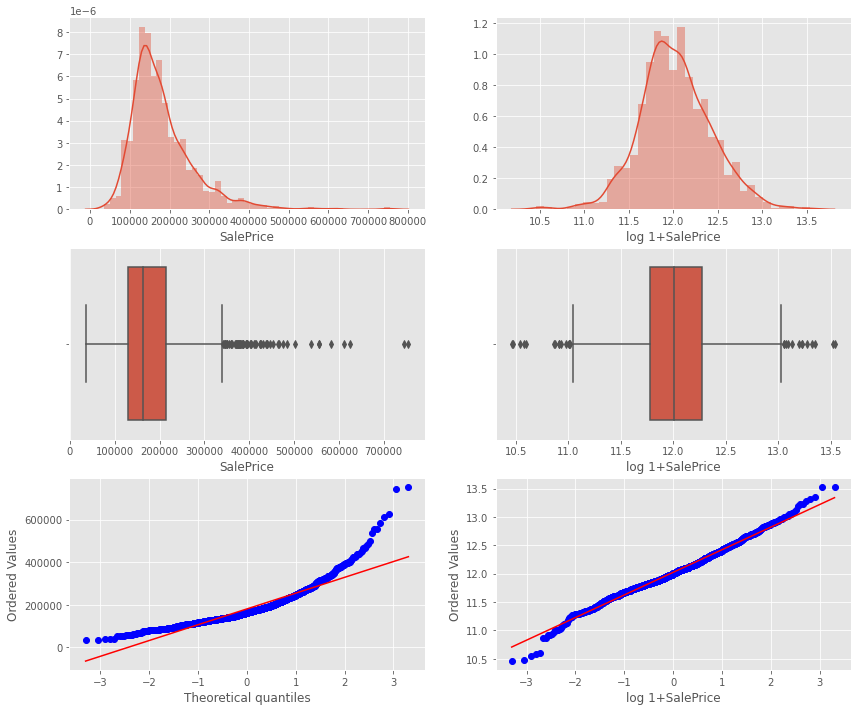

In [15]:
chart_singlevar_dist(housing, 'SalePrice')

In [16]:
# Take log of SalePrice and set it as our target variable
target = np.log1p(housing.SalePrice)

In [17]:
def corr_plot(df, varlist):
    """
    Takes a dataframe df and plots a correlation chart of all combinations of variables identified
    in varlist list of variable names.
    """
    train_corr = df[varlist].corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 8))
    # mask
    mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
    # adjust mask and df
    corr = train_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(train_corr, mask=mask, annot=False, fmt=".2f", cmap='Blues',
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    return plt.show()

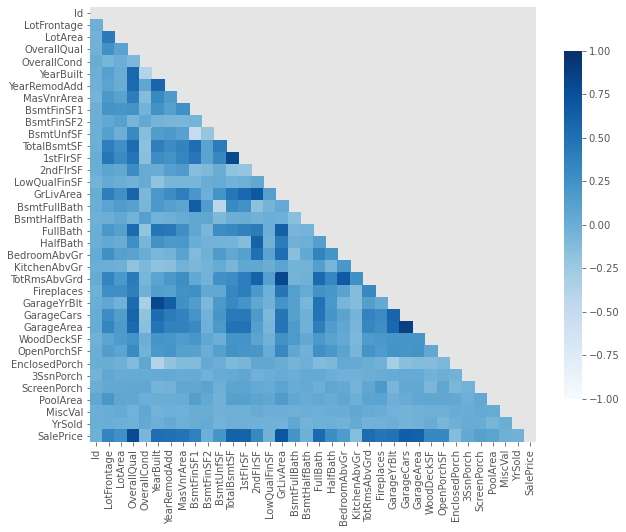

In [18]:
# Correlation plot of all variables
corr_plot(housing, list(housing.columns))

In [19]:
# Correlation plot of predictor variables with abs(corr) > 0.7 to detect multicollinearity
corr_matrix = housing.drop(['Id','SalePrice'], axis=1).corr(method='pearson').corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol = pd.DataFrame(sol).reset_index()
sol.columns = ['var1','var2','cor']
print(sol.loc[sol.cor > 0.7,:])
mcvar = list(sol.loc[sol.cor > 0.7,:].drop('cor', axis=1).melt().value.unique())

            var1           var2       cor
0     GarageCars     GarageArea  0.986339
1      YearBuilt    GarageYrBlt  0.973122
2    TotalBsmtSF       1stFlrSF  0.960325
3      GrLivArea   TotRmsAbvGrd  0.942088
4   YearRemodAdd    GarageYrBlt  0.900875
5    OverallQual     GarageCars  0.892770
6     BsmtFinSF1   BsmtFullBath  0.876515
7      YearBuilt   YearRemodAdd  0.874573
8    OverallQual     GarageArea  0.867500
9    GarageYrBlt     GarageCars  0.850242
10  BedroomAbvGr   TotRmsAbvGrd  0.844658
11     YearBuilt     GarageCars  0.837035
12   OverallQual      YearBuilt  0.834579
13   OverallQual    GarageYrBlt  0.829023
14   OverallQual       FullBath  0.823684
15   OverallQual   YearRemodAdd  0.821662
16     GrLivArea       FullBath  0.820026
17   GarageYrBlt     GarageArea  0.817914
18      2ndFlrSF       HalfBath  0.812515
19     YearBuilt     GarageArea  0.807326
20      2ndFlrSF   TotRmsAbvGrd  0.768053
21      FullBath     GarageCars  0.759251
22      FullBath   TotRmsAbvGrd  0

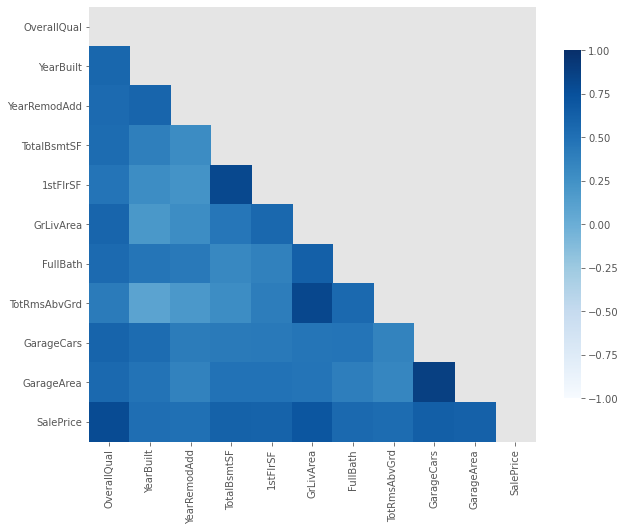

In [20]:
# Correlation plot of variables with >0.6 correlation with SalePrice to identify features that are useful
corr_plot(housing, salescorr_vars)

## Data Exploration Insights
1. There are 80 features with a sample of 1460 homes that we can use to try model SalePrice of homes in Ames. 
2. The features consist of 35 numerical and 45 categorical variables and has lots of missing data as well as apparent outliers.
3. There are a few skewed distributions of features, which would require some sort of transformation if using linear models to predict SalePrice.
4. The distribution of SalePrice itself, is skewed-right and a log transformation makes the data look decently normal, which is encouraging if we want to apply the class of linear models.
5. Important predictors of SalePrice are: OverallQual, YearBuilt, variables related to size, variables related to Garage.
6. Initial assessments of Pearson correlation coefficients indicate there is duplicate information within features like: GarageCars/GarageArea, YrBuilt/GarageYrBlt, TotalBsmtSF/1stFlrSF, GrLivArea/TotRmsAbvGrd.
7. Before conducting feature engineering, we will pre-process data for missingness and duplication

## Dealing with missingness
1. Most data are not missing at random, they represent the lack of feature i.e don't have a pool or fireplace

In [21]:
# Straightforward Not Missing At Random (NMAR) in that missing means not available or present, set those to N
setnolist = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',\
             'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2','BsmtFinType1', 'BsmtCond',\
             'BsmtQual']
housing[setnolist] = housing[setnolist].fillna('N')

In [22]:
# Straightforward NMAR in that missing means not available or present, set those to None
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

In [23]:
# These variables are not straightforward to complete missingness

# Electrical
housing['Electrical'].value_counts()
# The category Mix represents a mixed electrical system and there is only one house with this system. Use this for the single missing value
# since it won't make a material difference.
housing['Electrical'] = housing['Electrical'].fillna('Mix')

# MasVnrArea
msonlist = ['MasVnrArea', 'MasVnrType']
housing.loc[housing['MasVnrArea'].isnull(), msonlist]
# It turns out that all of the houses with missing MasVnrArea don't have a Masonry Veneer. So can set to 0
housing['MasVnrArea'].fillna(0,inplace=True)

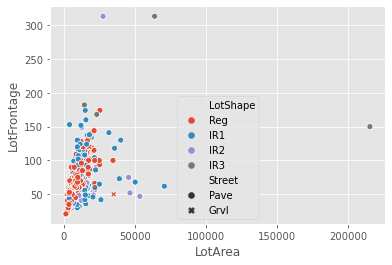

In [24]:
#LotFrontage
lotlist = ['LotFrontage', 'LotArea', 'LotShape', 'Street']
housing.loc[housing['LotFrontage'].isnull(), lotlist]

# See relationship between LotFront and Lot Area
normlot=housing[lotlist]
#normlot = housing[lotlist].dropna()
#normlot = normlot.loc[normlot[['LotFrontage', 'LotArea']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sns.scatterplot(data=normlot, x='LotArea', y='LotFrontage', hue='LotShape', style='Street')

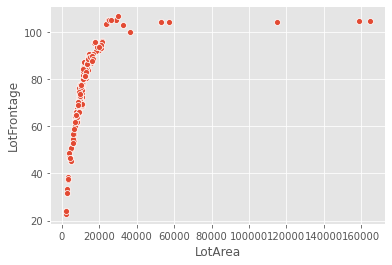

In [25]:
# LotFrontage appears to be Missing at Random (MAR) so use kNN imputation
# Sqrt(1200) is about 35, so use that for K, which will also be robust to outliers (which is present)
imputer = KNNImputer(n_neighbors=35)
lotlist = ['LotFrontage', 'LotArea']
imputedvals = pd.DataFrame(imputer.fit_transform(housing[lotlist]), columns=lotlist)
sns.scatterplot(data=imputedvals.loc[housing['LotFrontage'].isnull(), lotlist], x='LotArea', y='LotFrontage')
# Most of the data imputation <50000 LotArea makese sense but there are a few outliers for larger LotArea. This is fine for now
# because we will deal with outliers later.
housing['LotFrontage'] = imputedvals['LotFrontage']

In [26]:
garagelist = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual']
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].shape)
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].value_counts())
# Easy one to solve, GarageYrBlt is not missing at random, it is because there is no Garage. Impute with zeros
housing['GarageYrBlt'].fillna(0,inplace=True)

(81,)
N    81
Name: GarageType, dtype: int64


In [27]:
# Check for missing values in total dataset again
housing.isna().sum().sum()

0

Excellent! we have dealt with all missing values.

## Dropping unnecessary features and converting numerical to categorical if need be
1. Check features identified to have outliers and remove obvious ones
2. Consider transformations when it appears that feature is skewed or has many outliers

In [28]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'SalePrice')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.0,numerical,0,3.086696,-0.128578,208
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,-0.011378,167
18,OverallCond,1460,0,1460,0.0,numerical,0,0.692355,-0.077856,125
70,ScreenPorch,1460,0,1460,0.0,numerical,0,4.117977,0.111447,116
26,MasVnrArea,1460,0,1460,0.0,numerical,0,2.674865,0.472614,98
3,LotFrontage,1460,0,1460,0.0,numerical,0,1.942872,0.346774,87
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,-0.016844,82
59,GarageYrBlt,1460,0,1460,0.0,numerical,0,-3.865524,0.261366,81
67,OpenPorchSF,1460,0,1460,0.0,numerical,0,2.361912,0.315856,77
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.263843,69


### Explore porch-related variables

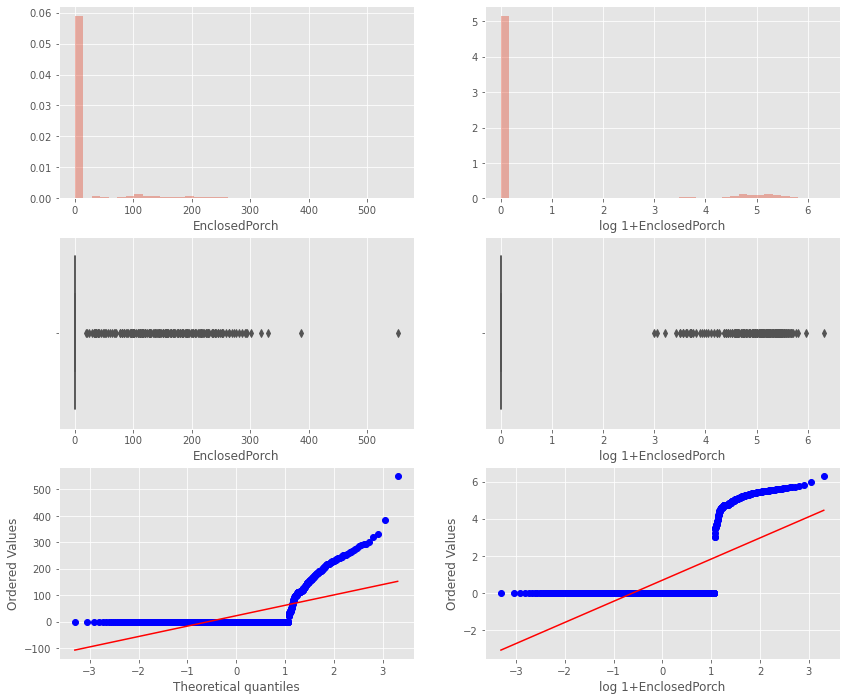

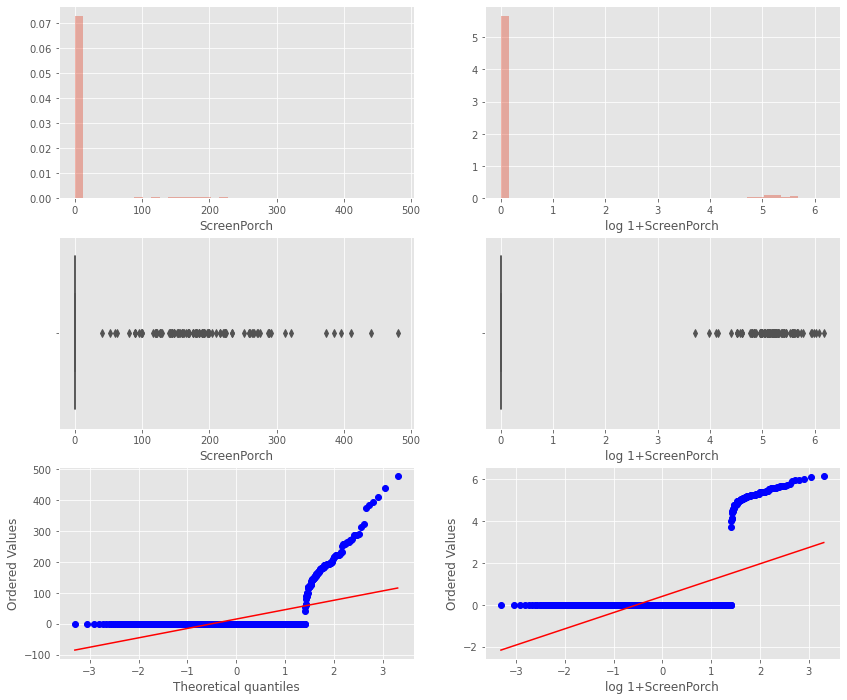

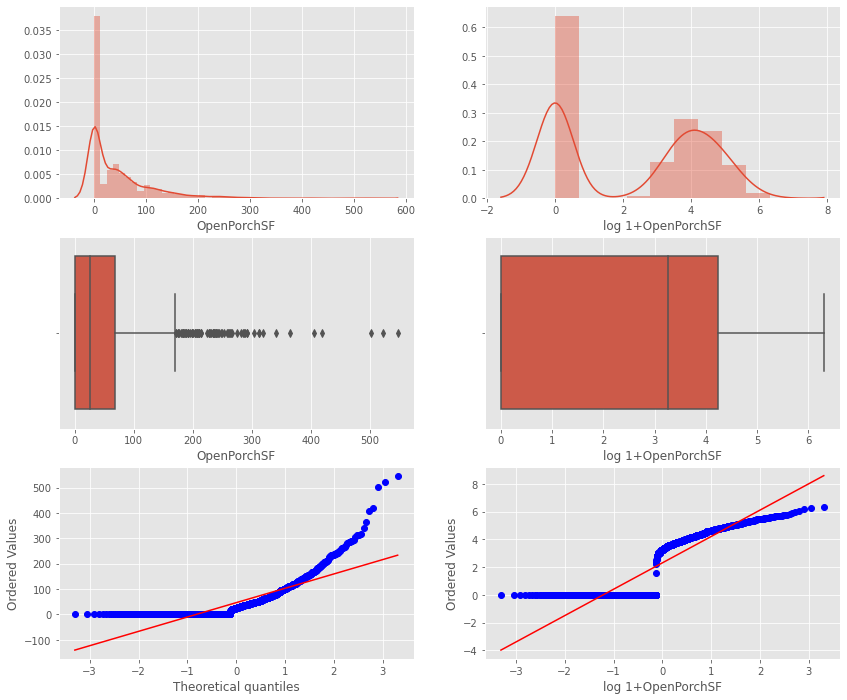

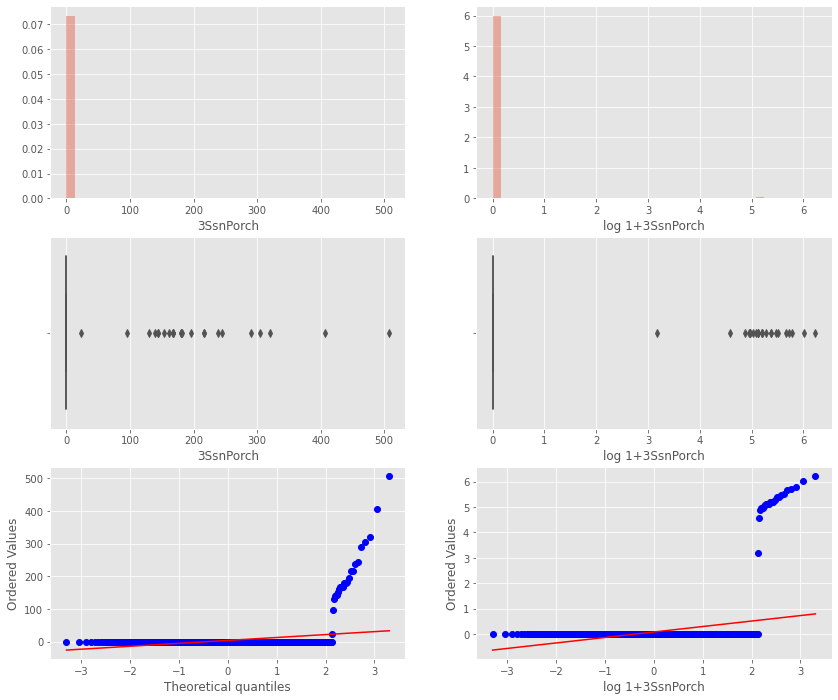

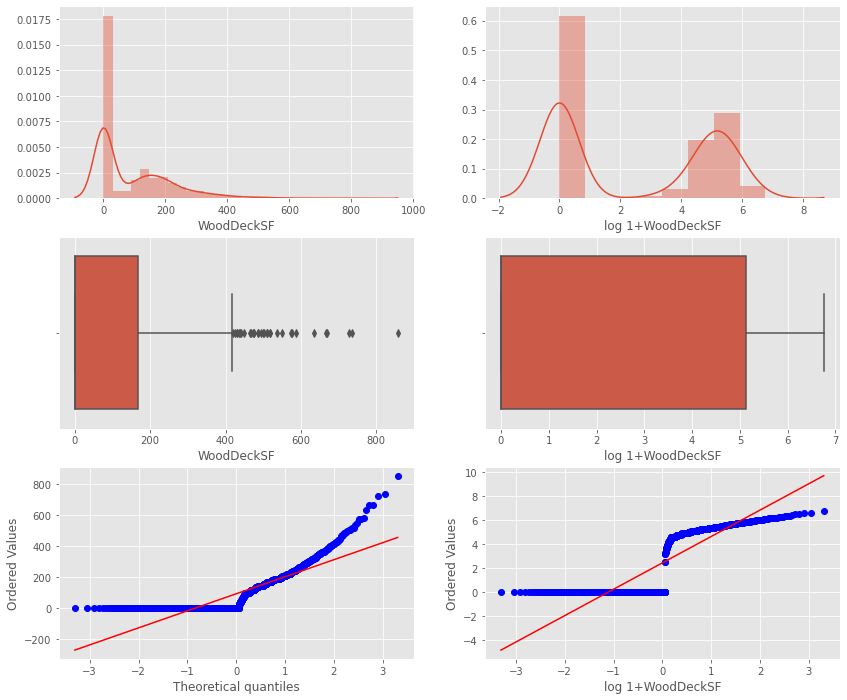

In [29]:
chart_singlevar_dist(housing, 'EnclosedPorch')
chart_singlevar_dist(housing, 'ScreenPorch')
chart_singlevar_dist(housing, 'OpenPorchSF')
chart_singlevar_dist(housing, '3SsnPorch')
chart_singlevar_dist(housing, 'WoodDeckSF')
# All of these variables are imbalanced due to many zeros which represent lack of feature. Consider making these categorical variables

In [30]:
def porchplots(porchvar, bins):
    """
    Scatterplot of relevant porch variable against SalePrice with and without bins. Only filters for non-zero
    values of porch variable and shows 2 charts, one without bins and one with bins. This helps to identify
    cut-off values of porch variable to convert numeric feature into categorical feature
    """
    fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
    sns.regplot(data=housing[(housing[porchvar]!=0)], x=porchvar, y='SalePrice', ax=ax[0])
    sns.regplot(data=housing[(housing[porchvar]!=0)], x=porchvar, y='SalePrice', x_bins=bins, ax=ax[1])
    ax[0].set(xlabel = porchvar+' (non-zero values)', title='No Bins')
    ax[1].set(xlabel = porchvar+' (non-zero values)', title='With Bins')

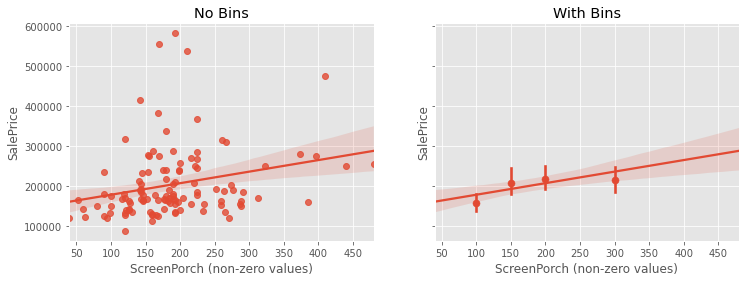

In [31]:
# Plot screenporch scatter charts    
porchplots('ScreenPorch',[100,150,200,300])
# It appears that 125 is a good cut-off value

In [32]:
def porch_category(porchval):
    """
    Simple function to categorise relevant porch variable according to cutoff
    """
    if porchval == 0:
        return 'N'
    elif porchval > 0 and porchval <= 125:
        return '0to125'
    elif porchval > 125:
        return '125plus'
housing['ScreenPorch'] = housing['ScreenPorch'].apply(porch_category)

In [33]:
housing['ScreenPorch'].value_counts()

N          1344
125plus      96
0to125       20
Name: ScreenPorch, dtype: int64

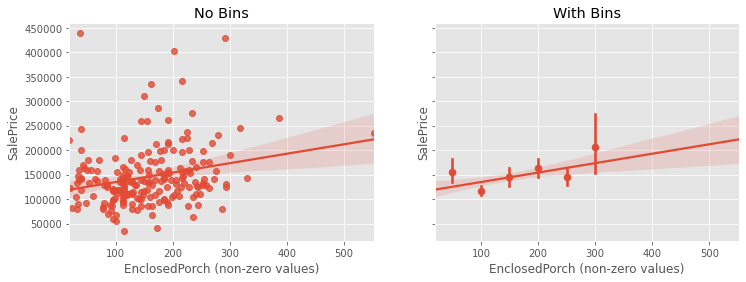

In [34]:
# Plot EnclosedPorch scatter charts    
porchplots('EnclosedPorch',[50,100,150,200,250,300])
# It appears that 275 is a good cut-off value

In [35]:
def porch_category(porchval):
    """
    Simple function to categorise relevant porch variable according to cutoff
    """
    if porchval == 0:
        return 'N'
    elif porchval > 0 and porchval <= 275:
        return '0to275'
    elif porchval > 275:
        return '275plus'
housing['EnclosedPorch'] = housing['EnclosedPorch'].apply(porch_category)

In [36]:
housing['EnclosedPorch'].value_counts()

N          1252
0to275      198
275plus      10
Name: EnclosedPorch, dtype: int64

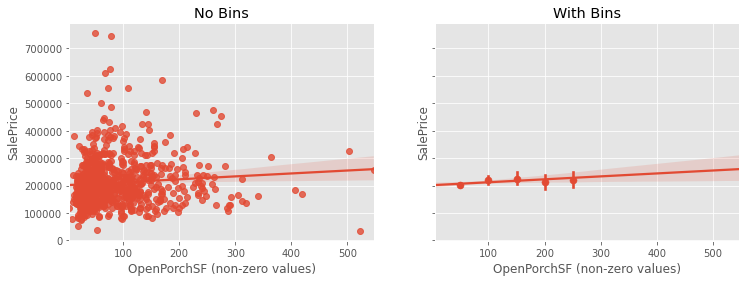

In [37]:
# Plot OpenPorchSF scatter charts    
porchplots('OpenPorchSF',[50,100,150,200,250])
# No need for a cut-off value

In [38]:
def porch_category(porchval):
    """
    Simple function to categorise relevant porch variable according to cutoff
    """
    if porchval == 0:
        return 'N'
    elif porchval > 0:
        return 'Y'
housing['OpenPorchSF'] = housing['OpenPorchSF'].apply(porch_category)
housing['OpenPorchSF'].value_counts()

Y    804
N    656
Name: OpenPorchSF, dtype: int64

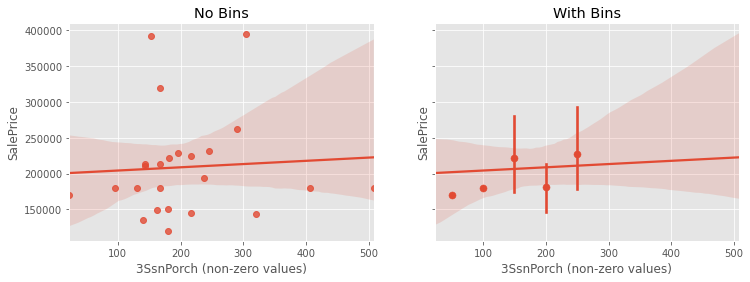

In [39]:
# Plot 3SsnPorch scatter charts    
porchplots('3SsnPorch',[50,100,150,200,250])
# No need for cut-off value

In [40]:
def porch_category(porchval):
    """
    Simple function to categorise relevant porch variable according to cutoff
    """
    if porchval == 0:
        return 'N'
    elif porchval > 0:
        return 'Y'
housing['3SsnPorch'] = housing['3SsnPorch'].apply(porch_category)
housing['3SsnPorch'].value_counts()

N    1436
Y      24
Name: 3SsnPorch, dtype: int64

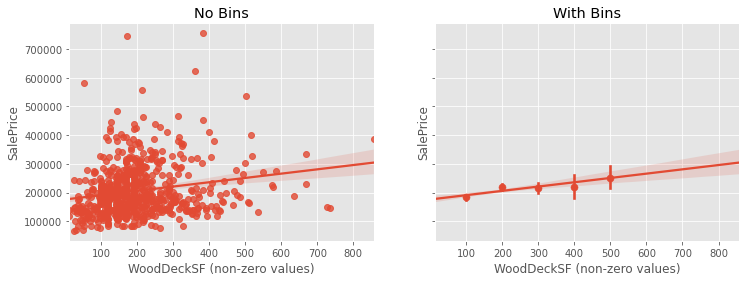

In [41]:
# Plot 3SsnPorch scatter charts    
porchplots('WoodDeckSF',[100,200,300,400,500])
# Perhaps keep variable as is

In [42]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'SalePrice')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
75,MiscVal,1460,0,1460,0.0,numerical,0,24.451640,-0.021190,52
71,PoolArea,1460,0,1460,0.0,numerical,0,14.813135,0.092404,7
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.263843,69
45,LowQualFinSF,1460,0,1460,0.0,numerical,0,9.002080,-0.025606,26
52,KitchenAbvGr,1460,0,1460,0.0,numerical,0,4.483784,-0.135907,68
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,-0.011378,167
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,-0.016844,82
26,MasVnrArea,1460,0,1460,0.0,numerical,0,2.674865,0.472614,98
3,LotFrontage,1460,0,1460,0.0,numerical,0,1.942872,0.346774,87
80,SalePrice,1460,0,1460,0.0,numerical,0,1.880941,1.000000,61


### Explore Misc. variables

In [43]:
housing.MiscFeature.value_counts()

N       1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [44]:
housing[housing.MiscFeature == 'TenC']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1386,1387,60,RL,80.0,16692,Pave,N,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000


In [45]:
housing[housing.MiscFeature == 'Shed']['MiscVal'].describe()

count      49.000000
mean      697.836735
std       512.853266
min         0.000000
25%       400.000000
50%       500.000000
75%       700.000000
max      2500.000000
Name: MiscVal, dtype: float64

In [46]:
# Remove data points for Tennis Court, Garage2, and Other 2 since not enough data to make any meaningful conclusions
# Dummify variable to indicate shed or no shed
# Drop MiscVal variable since not really interested in value of shed
dropindex = housing[(housing.MiscFeature == 'TenC') | (housing.MiscFeature == 'Othr') | (housing.MiscFeature == 'Gar2')].index
housing.drop(dropindex, axis=0, inplace=True)

In [47]:
housing['Shed'] = housing.MiscFeature

In [48]:
housing['Shed'].value_counts()

N       1406
Shed      49
Name: Shed, dtype: int64

In [49]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Shed':
        return 'Y'
    else: return 'N'
housing['Shed'] = housing['Shed'].apply(categorize)
housing['Shed'].value_counts()

N    1406
Y      49
Name: Shed, dtype: int64

In [50]:
# Drop MiscVal feature
housing.drop('MiscVal',axis=1, inplace=True)

In [51]:
housing.drop('MiscFeature',axis=1, inplace=True)

In [52]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'SalePrice')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
71,PoolArea,1455,0,1455,0.0,numerical,0,15.997797,0.089999,6
4,LotArea,1455,0,1455,0.0,numerical,0,12.194180,0.263468,69
45,LowQualFinSF,1455,0,1455,0.0,numerical,0,9.129187,-0.023970,25
52,KitchenAbvGr,1455,0,1455,0.0,numerical,0,4.556413,-0.133457,66
36,BsmtFinSF2,1455,0,1455,0.0,numerical,0,4.272066,-0.013578,165
48,BsmtHalfBath,1455,0,1455,0.0,numerical,0,4.090953,-0.017129,82
26,MasVnrArea,1455,0,1455,0.0,numerical,0,2.671075,0.472245,98
3,LotFrontage,1455,0,1455,0.0,numerical,0,1.944960,0.347007,87
78,SalePrice,1455,0,1455,0.0,numerical,0,1.884269,1.000000,61
34,BsmtFinSF1,1455,0,1455,0.0,numerical,0,1.683681,0.385577,7


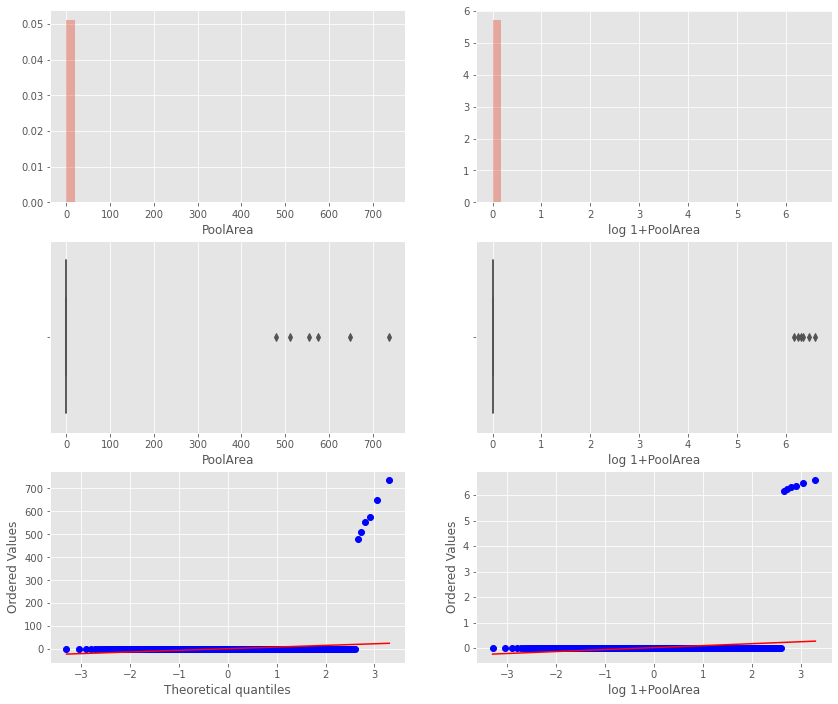

In [53]:
# Pool Area
chart_singlevar_dist(housing, 'PoolArea')

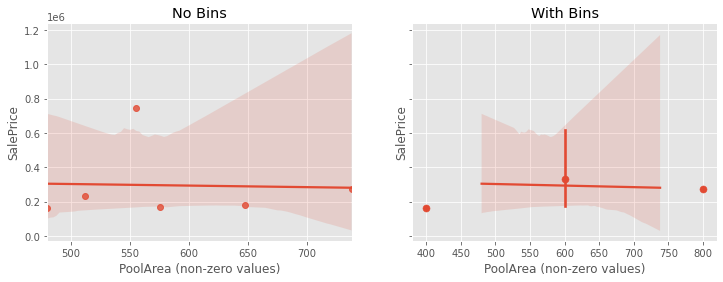

In [54]:
# Plot 3SsnPorch scatter charts    
porchplots('PoolArea',[200,400,600,800])
# Only 6 datapoints so make variable binary catgorical and drop PoolArea

In [55]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'N':
        return 'N'
    else: return 'Y'
housing['PoolQC'] = housing['PoolQC'].apply(categorize)
housing['PoolQC'].value_counts()

N    1449
Y       6
Name: PoolQC, dtype: int64

In [56]:
# Drop MiscVal feature
housing.drop('PoolArea',axis=1, inplace=True)

In [57]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'SalePrice')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
4,LotArea,1455,0,1455,0.0,numerical,0,12.194180,0.263468,69
45,LowQualFinSF,1455,0,1455,0.0,numerical,0,9.129187,-0.023970,25
52,KitchenAbvGr,1455,0,1455,0.0,numerical,0,4.556413,-0.133457,66
36,BsmtFinSF2,1455,0,1455,0.0,numerical,0,4.272066,-0.013578,165
48,BsmtHalfBath,1455,0,1455,0.0,numerical,0,4.090953,-0.017129,82
26,MasVnrArea,1455,0,1455,0.0,numerical,0,2.671075,0.472245,98
3,LotFrontage,1455,0,1455,0.0,numerical,0,1.944960,0.347007,87
77,SalePrice,1455,0,1455,0.0,numerical,0,1.884269,1.000000,61
34,BsmtFinSF1,1455,0,1455,0.0,numerical,0,1.683681,0.385577,7
38,TotalBsmtSF,1455,0,1455,0.0,numerical,0,1.537103,0.612485,60


In [58]:
housing[housing.LotArea > 50000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Shed
53,54,20,RL,68.000000,50271,Pave,N,IR1,Low,AllPub,...,N,N,N,N,11,2006,WD,Normal,385000,N
249,250,50,RL,104.628571,159000,Pave,N,IR2,Low,AllPub,...,N,N,N,N,6,2007,WD,Normal,277000,Y
313,314,20,RL,150.000000,215245,Pave,N,IR3,Low,AllPub,...,N,N,N,N,6,2009,WD,Normal,375000,N
335,336,190,RL,104.628571,164660,Grvl,N,IR1,HLS,AllPub,...,N,N,N,N,8,2008,WD,Normal,228950,Y
384,385,60,RL,104.342857,53107,Pave,N,IR2,Low,AllPub,...,N,N,N,N,6,2007,WD,Normal,240000,N
451,452,20,RL,62.000000,70761,Pave,N,IR1,Low,AllPub,...,N,N,N,N,12,2006,WD,Normal,280000,N
457,458,20,RL,104.342857,53227,Pave,N,IR1,Low,AllPub,...,N,N,N,N,3,2008,WD,Normal,256000,N
706,707,20,RL,104.342857,115149,Pave,N,IR2,Low,AllPub,...,N,N,N,N,6,2007,WD,Normal,302000,N
769,770,60,RL,47.000000,53504,Pave,N,IR2,HLS,AllPub,...,N,125plus,N,N,6,2010,WD,Normal,538000,N
1298,1299,60,RL,313.000000,63887,Pave,N,IR3,Bnk,AllPub,...,N,N,Y,N,1,2008,New,Partial,160000,N


In [59]:
# Drop values >50,000 since those lot areas would probably make property a special case and only 10 records
dropindex = housing[housing.LotArea > 50000].index
housing.drop(dropindex, axis=0, inplace=True)

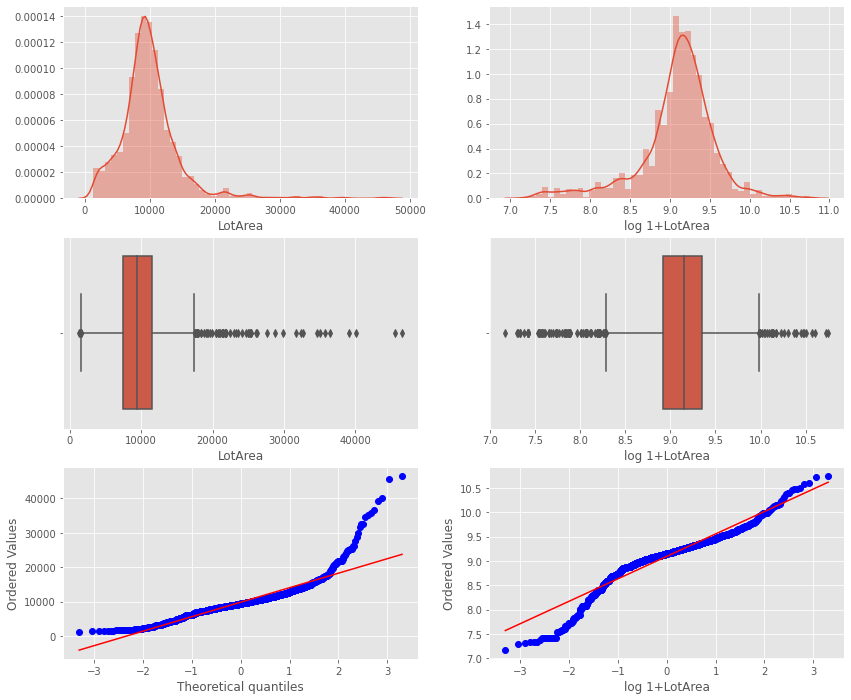

In [60]:
# Lot Area
chart_singlevar_dist(housing, 'LotArea')

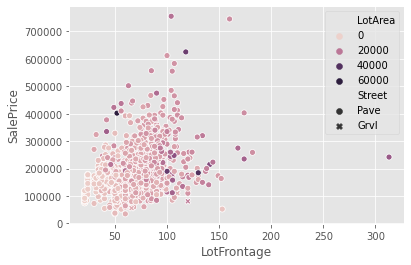

In [61]:
sns.scatterplot(data=housing, x='LotFrontage', y='SalePrice', hue='LotArea', style='Street')

In [62]:
housing[housing.LotFrontage > 160]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Shed
197,198,75,RL,174.0,25419,Pave,N,Reg,Lvl,AllPub,...,N,N,Y,GdPrv,3,2006,WD,Abnorml,235000,N
231,232,60,RL,174.0,15138,Pave,N,IR1,Lvl,AllPub,...,N,N,N,N,7,2009,WD,Normal,403000,N
934,935,20,RL,313.0,27650,Pave,N,IR2,HLS,AllPub,...,N,N,N,N,11,2008,WD,Normal,242000,N
1107,1108,60,RL,168.0,23257,Pave,N,IR3,HLS,AllPub,...,N,N,N,N,9,2006,New,Partial,274725,N
1127,1128,20,RL,182.0,14572,Pave,N,IR3,Lvl,AllPub,...,N,N,N,N,11,2007,WD,Family,259000,N


In [63]:
# Drop values >160 since only 5 records and seems to be special cases
dropindex = housing[housing.LotFrontage > 160].index
housing.drop(dropindex, axis=0, inplace=True)

In [64]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Reg':
        return 'Reg'
    else: return 'Irreg'
housing['LotShape'] = housing['LotShape'].apply(categorize)
housing['LotShape'].value_counts()

Reg      922
Irreg    517
Name: LotShape, dtype: int64

In [65]:
housing.Street.value_counts()

Pave    1434
Grvl       5
Name: Street, dtype: int64

In [66]:
# Drop street feature since only 5 values with gravel and not important feature from initial indications
housing.drop('Street', axis=1, inplace=True)

In [67]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'SalePrice')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
44,LowQualFinSF,1439,0,1439,0.0,numerical,0,9.353661,-0.027146,24
51,KitchenAbvGr,1439,0,1439,0.0,numerical,0,4.527759,-0.132729,66
35,BsmtFinSF2,1439,0,1439,0.0,numerical,0,4.303199,-0.018955,161
47,BsmtHalfBath,1439,0,1439,0.0,numerical,0,4.129006,-0.019573,80
25,MasVnrArea,1439,0,1439,0.0,numerical,0,2.704080,0.476095,94
4,LotArea,1439,0,1439,0.0,numerical,0,2.298378,0.375478,65
76,SalePrice,1439,0,1439,0.0,numerical,0,1.911202,1.000000,62
65,WoodDeckSF,1439,0,1439,0.0,numerical,0,1.424666,0.316044,29
45,GrLivArea,1439,0,1439,0.0,numerical,0,1.124288,0.724387,27
42,1stFlrSF,1439,0,1439,0.0,numerical,0,0.981736,0.622720,20


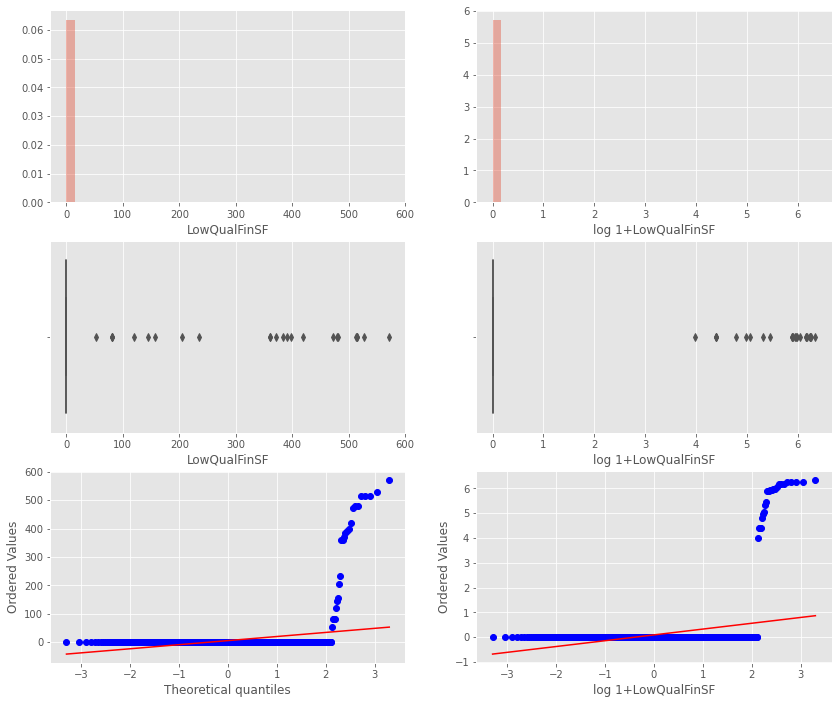

In [68]:
# LowQualFinSF
chart_singlevar_dist(housing, 'LowQualFinSF')

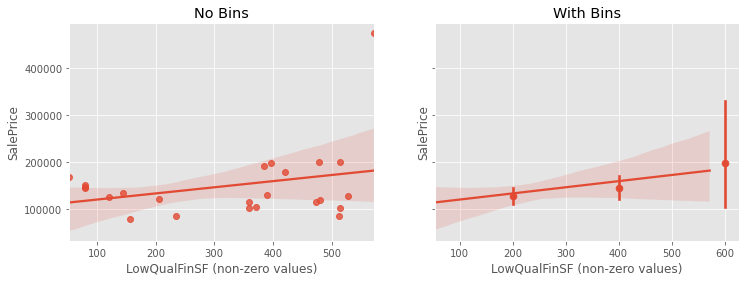

In [69]:
# Plot LowQualFinSF scatter charts    
porchplots('LowQualFinSF',[200,400,600,800])
# Only 6 datapoints so make variable binary catgorical

In [70]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    else: return 'Y'
housing['LowQualFinSF'] = housing['LowQualFinSF'].apply(categorize)
housing['LowQualFinSF'].value_counts()
housing.rename(columns={'LowQualFinSF': 'LowQualFin'}, inplace=True)

N    1415
Y      24
Name: LowQualFinSF, dtype: int64

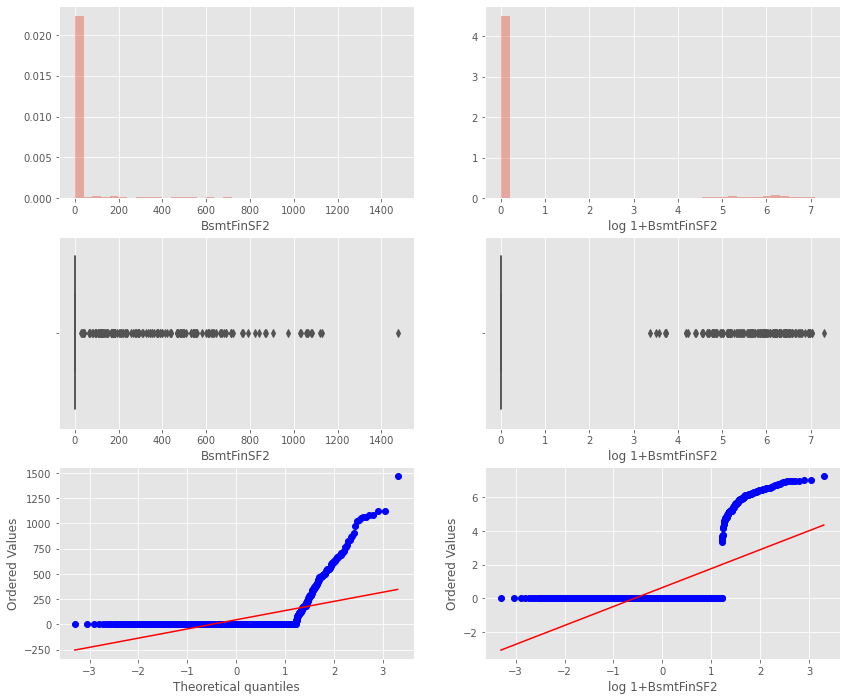

In [71]:
chart_singlevar_dist(housing, 'BsmtFinSF2')

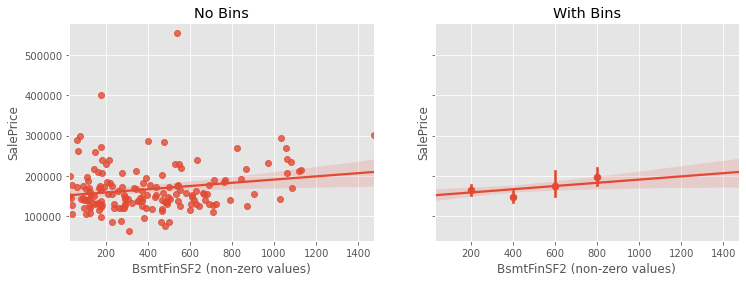

In [72]:
# Plot LowQualFinSF scatter charts    
porchplots('BsmtFinSF2',[200,400,600,800])
# Only 6 datapoints so make variable binary catgorical

In [73]:
housing.KitchenQual.value_counts()

TA    729
Gd    575
Ex     97
Fa     38
Name: KitchenQual, dtype: int64

In [74]:
basevar = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
housing[basevar]

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,856,706,0,150
1,1262,978,0,284
2,920,486,0,434
3,756,216,0,540
4,1145,655,0,490
...,...,...,...,...
1455,953,0,0,953
1456,1542,790,163,589
1457,1152,275,0,877
1458,1078,49,1029,0


In [75]:
# Drop BsmtFinSF1 and 2 since duplicate information, also drop FinType1 and FinType2
housing.drop('BsmtFinSF1', axis=1, inplace=True)
housing.drop('BsmtFinSF2', axis=1, inplace=True)
housing.drop('BsmtFinType1', axis=1, inplace=True)
housing.drop('BsmtFinType2', axis=1, inplace=True)

In [76]:
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
for var in basevar:
    print(housing[var].value_counts())

TA    644
Gd    606
Ex    118
N      36
Fa     35
Name: BsmtQual, dtype: int64
TA    1292
Gd      64
Fa      45
N       36
Po       2
Name: BsmtCond, dtype: int64
No    947
Av    218
Gd    124
Mn    113
N      37
Name: BsmtExposure, dtype: int64


In [77]:
# Data error with BsmtExposure since have 37 with no basement vs 36 from other 2 variables
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF']
housing.loc[(housing.BsmtExposure == 'N') & (housing.BsmtCond != 'N'),'BsmtExposure'] = 'No'

In [78]:
# Create sing variable for number of bathrooms in basement
housing['BsmtBath'] = housing['BsmtFullBath'] + housing['BsmtHalfBath']
basevar = ['BsmtBath', 'BsmtFullBath', 'BsmtHalfBath']
for var in basevar:
    print(housing[var].value_counts())

0    778
1    639
2     21
3      1
Name: BsmtBath, dtype: int64
0    850
1    577
2     11
3      1
Name: BsmtFullBath, dtype: int64
0    1359
1      78
2       2
Name: BsmtHalfBath, dtype: int64


In [79]:
# Drop previous basement bathroom variables
housing.drop('BsmtFullBath', axis=1, inplace=True)
housing.drop('BsmtHalfBath', axis=1, inplace=True)

In [80]:
#Explore Garage features
grgvar = ['GarageType', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
housing[grgvar]

,GarageType,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
0,Attchd,Attchd,RFn,2,548,TA,TA,Y
1,Attchd,Attchd,RFn,2,460,TA,TA,Y
2,Attchd,Attchd,RFn,2,608,TA,TA,Y
3,Detchd,Detchd,Unf,3,642,TA,TA,Y
4,Attchd,Attchd,RFn,3,836,TA,TA,Y
...,...,...,...,...,...,...,...,...
1455,Attchd,Attchd,RFn,2,460,TA,TA,Y
1456,Attchd,Attchd,Unf,2,500,TA,TA,Y
1457,Attchd,Attchd,RFn,1,252,TA,TA,Y
1458,Attchd,Attchd,Unf,1,240,TA,TA,Y


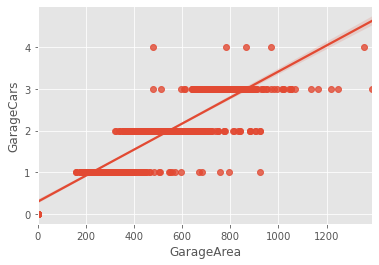

In [81]:
sns.regplot(data=housing, x='GarageArea', y='GarageCars')

In [82]:
# Drop GarageCars because size of garage implicitly tell syou how many cars can fit. GarageCars doesn't give extra information
housing.drop('GarageCars', axis=1, inplace=True)

In [83]:
grgvar = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
for var in grgvar:
    print(housing[var].value_counts())

Attchd     855
Detchd     385
BuiltIn     85
N           80
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    600
RFn    416
Fin    343
N       80
Name: GarageFinish, dtype: int64
TA    1291
N       80
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1306
N       80
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Y    1322
N      87
P      30
Name: PavedDrive, dtype: int64


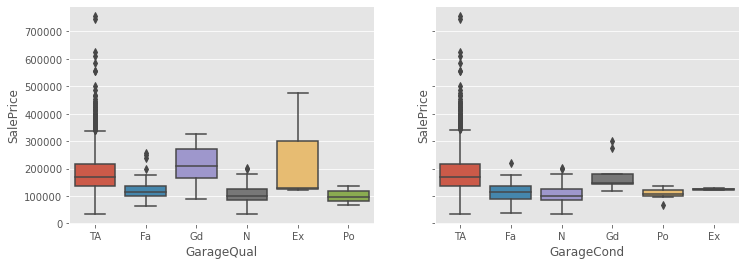

In [84]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
sns.boxplot(data=housing, x='GarageQual', y='SalePrice', ax=ax[0])
sns.boxplot(data=housing, x='GarageCond', y='SalePrice', ax=ax[1])

In [85]:
# Garage quality seems to be distinguishing SalePrice better than Garage condition. They both appear to be very
# similar variables so drop GarageCondition
housing.drop('GarageCond', axis=1, inplace=True)

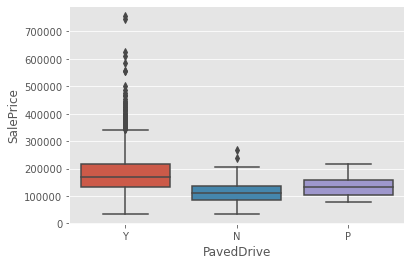

In [86]:
# Check difference between partial or no paved driveways
sns.boxplot(data=housing, x='PavedDrive', y='SalePrice')

In [87]:
# Check living areas and number of bedrooms
bedvar = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'KitchenAbvGr']
housing[bedvar]

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,FullBath,HalfBath,KitchenAbvGr
0,856,854,N,1710,3,8,2,1,1
1,1262,0,N,1262,3,6,2,0,1
2,920,866,N,1786,3,6,2,1,1
3,961,756,N,1717,3,7,1,0,1
4,1145,1053,N,2198,4,9,2,1,1
...,...,...,...,...,...,...,...,...,...
1455,953,694,N,1647,3,7,2,1,1
1456,2073,0,N,2073,3,7,2,0,1
1457,1188,1152,N,2340,4,9,2,0,1
1458,1078,0,N,1078,2,5,1,0,1


In [93]:
# TotalRmsAbvGrd is a duplicate so drop feature
housing['NonBedAbvGrd'] = housing['TotRmsAbvGrd'] - housing['BedroomAbvGr'] - housing['KitchenAbvGr']
bedvar = ['NonBedAbvGrd', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr']
housing[bedvar]
housing.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [94]:
bedvar = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath']
housing[bedvar]

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath
0,856,854,N,1710,2,1
1,1262,0,N,1262,2,0
2,920,866,N,1786,2,1
3,961,756,N,1717,1,0
4,1145,1053,N,2198,2,1
...,...,...,...,...,...,...
1455,953,694,N,1647,2,1
1456,2073,0,N,2073,2,0
1457,1188,1152,N,2340,2,0
1458,1078,0,N,1078,1,0


In [100]:
# GrLivingArea is the sum of 1stFlrSF and 2ndFlrSF so creates perfect multicollinearity. Drop first and second floor
# because there are other variables that indicate if a house is a double-story.
housing.drop('1stFlrSF', axis=1, inplace=True)
housing.drop('2ndFlrSF', axis=1, inplace=True)

In [108]:
# Summary of housing dataframe again
summarydf = summarise_data(housing, 'SalePrice')
summarydf.sort_values('PearsonCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
65,SalePrice,1439,0,1439,0.0,numerical,0,1.911202,1.000000,62
16,OverallQual,1439,0,1439,0.0,numerical,0,0.213837,0.798419,2
39,GrLivArea,1439,0,1439,0.0,numerical,0,1.124288,0.724387,27
33,TotalBsmtSF,1439,0,1439,0.0,numerical,0,0.597219,0.642438,62
68,NonBedAbvGrd,1439,0,1439,0.0,numerical,0,0.866778,0.635480,97
...,...,...,...,...,...,...,...,...,...,...
60,Fence,1439,0,1439,0.0,categorical,5,0.000000,NaN,0
61,MoSold,1439,0,1439,0.0,categorical,12,0.000000,NaN,0
63,SaleType,1439,0,1439,0.0,categorical,9,0.000000,NaN,0
64,SaleCondition,1439,0,1439,0.0,categorical,6,0.000000,NaN,0


## One-hot encoding of categorical variables
1. Before one-hot encoding, scale the numerical variables because we will apply PCA
2. Use one-hot encoding to convert categorical features into numerical using one-hot encoding
3. 80 features will explode to about 285, which is still manageable
4. Data will be ready for PCA thereafter

In [89]:
# Drop Id and SalePrice to only leave features/response/independent variables
#housing.drop(['Id','SalePrice'], axis=1)
numerical_vars.remove('SalePrice')
numerical_vars.remove('Id')
features = housing.drop(['Id','SalePrice'], axis=1)
features[numerical_vars]

KeyError: "['PoolArea', 'BsmtFullBath', 'MiscVal', 'BsmtFinSF1', 'BsmtHalfBath', 'GarageCars', 'BsmtFinSF2'] not in index"

In [ ]:
# Scale all numerical features by subtracting mean and dividing by std. deviation
scaler = StandardScaler()
features[numerical_vars]=scaler.fit_transform(features[numerical_vars])
features[numerical_vars]

In [ ]:
onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
onehothousing

## Apply PCA on features to help understand components and potential R2
1. Now that we have no missing or catgorical data, we have exploded the dimensionality and hence sparsity of hyperspace to make  any meaningful predictions.
2. This is ripe to apply PCA to understand components

In [ ]:
pca = PCA()
numcomp = 50
pca.set_params(n_components=numcomp)
pca.fit(onehothousing)
plt.scatter(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 60)
plt.show()

In [ ]:
# The first 35 components explain ~85% of the variance. There appears to be no clear evidence of an elbow
# to indicate a definitive number of components that explain most of the variance.

In [ ]:
# Use the first 35 components to predict log(SalePrice) out of curiosity. The model should not have any problems with
# multicollinearity
pca.set_params(n_components=35)
pca.fit(onehothousing)
housingpca_scale35 = pca.transform(onehothousing)
lm = LinearRegression()
lm.fit(housingpca_scale35, target)
print("The training error is: %.3f" %(1-lm.score(housingpca_scale35, target)))
print('R^2 is equal to %.3f' %(lm.score(housingpca_scale35, target)))
print('RSS is equal to %.3f' %(np.sum((target-lm.predict(housingpca_scale35))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

In [ ]:
x = sm.add_constant(housingpca_scale35)
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

In [ ]:
# PCA gives a clue of an R2 to target when applying Generalized Linear Models later on.

## Deal with correlated features

In [ ]:
# Features that are similar
sns.scatterplot(data=housing, x='1stFlrSF', y='TotalBsmtSF')

In [ ]:
# Features that are similar
sns.scatterplot(data=housing, x='YearBuilt', y='YearRemodAdd',hue='OverallQual')

In [ ]:
# Features that are similar
sns.scatterplot(data=housing, x='1stFlrSF', y='GrLivArea',hue='TotRmsAbvGrd')

In [ ]:
# Features that are similar
sns.scatterplot(data=housing, x='GarageArea', y='GarageCars',hue='GarageFinish')

In [ ]:
# Features that are similar
sns.scatterplot(data=housing, x='2ndFlrSF', y='BedroomAbvGr', hue='TotRmsAbvGrd')

In [ ]:
# Features that are similar
sns.scatterplot(data=housing, x='GarageArea', y='GarageCars',hue='GarageQual')

In [ ]:
# Features that are similar
sns.scatterplot(data=housing, x='LotArea', y='LotFrontage',hue='LotConfig')

In [ ]:
impfeatures = list(freq.keys())
len(impfeatures)

In [ ]:
pca = PCA()
numcomp = 42
pca.set_params(n_components=numcomp)
pca.fit(onehothousing[impfeatures])
plt.scatter(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 50)
plt.show()

In [ ]:
pca.set_params(n_components=None)
pca.fit(onehothousing[impfeatures])
housingpca_impf = pca.transform(onehothousing[impfeatures])
lm = LinearRegression()
lm.fit(housingpca_impf, target)
print("The training error is: %.3f" %(1-lm.score(housingpca_impf, target)))
print('R^2 is equal to %.3f' %(lm.score(housingpca_impf, target)))
print('RSS is equal to %.3f' %(np.sum((target-lm.predict(housingpca_impf))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

In [ ]:
x = sm.add_constant(housingpca_impf)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

In [ ]:
freq = CountFeaturesFromComponents(onehothousing[impfeatures], 20, 0.2, 1)

In [ ]:
list(freq.keys())

In [ ]:
impfeatures = ['OverallQual', 'YearBuilt', 'GrLivArea', 'FullBath',\
                'GarageArea', '2ndFlrSF', 'HalfBath', 'BedroomAbvGr',\
                'LotArea', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'KitchenAbvGr',\
                'YearRemodAdd', 'OverallCond', 'WoodDeckSF', 'BsmtHalfBath', 'YrSold', '3SsnPorch', \
                'LowQualFinSF', 'EnclosedPorch','PoolArea', 'OpenPorchSF', 'MasVnrArea', 'ScreenPorch',\
                'MiscVal', 'Fireplaces']
len(impfeatures)
pca = PCA()
numcomp = 27
pca.set_params(n_components=numcomp)
pca.fit(onehothousing[impfeatures])
plt.scatter(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 30)
plt.show()

In [ ]:
pca.set_params(n_components=None)
pca.fit(onehothousing[impfeatures])
housingpca_impf = pca.transform(onehothousing[impfeatures])
lm = LinearRegression()
lm.fit(housingpca_impf, target)
print("The training error is: %.3f" %(1-lm.score(housingpca_impf, target)))
print('R^2 is equal to %.3f' %(lm.score(housingpca_impf, target)))
print('RSS is equal to %.3f' %(np.sum((target-lm.predict(housingpca_impf))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

In [ ]:
x = sm.add_constant(housingpca_impf)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

In [ ]:
################################################################################################################################
################################################################################################################################

In [ ]:
df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df['Area'] = df['LotArea']*df['LotFrontage']
df['Area_log'] = np.log1p(df['Area'])

In [ ]:
# Code for jointplot of 2 variables
sns.jointplot(df['num_critic_for_reviews'], df['imdb_score'])

In [ ]:
# Aggregating different stats for different variables
colFun = {'country':['count'],
          'population': ['sum','min', 'max','mean','std'], 
          'area': ['sum','min', 'max','mean'],
          'coastline':['sum','min', 'max'],
          'birthrate':['min', 'max','mean','std'],
          'deathrate':['min', 'max','mean','std'],
          'life expectancy':['min', 'max','mean','std']}
analysis=group.agg(colFun)
analysis